<a name="top"> <h1>00. Data Preprocessing</h1> <a>

<p>Yelp Dataset- Stars Prediction<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>


<hr style="border:1px solid gray">

### Estructura

[1. Librerias utilizadas y funciones](#librerias) 

[2. Introducción ](#introduccion) 

   - Objetivo de negocio.

[3. Yelp Dataset ](#yelp) 

   - Información del dataset
   - Características del dataset


[4. Transformación del formato de ficheros](#transformacion) 


[5. Transformación de datos](#datos)

   - Business
       - Carga del fichero
       - Transformación de los datos
       - Exportación de ficheros procesados

<hr style="border:1px solid gray">

# <a name="librerias"> 1. Librerias utilizadas y funciones <a>


Importamos las librerias necesarias para realizar las transformaciones:

In [1]:
# Transformation libraries.

import json
import pandas as pd
from glob import glob 
import ast
from pandas import Timedelta
import numpy as np

Importamos funciones que utilizaremos durante la transformación de los datos:

In [2]:
# Load the necessary functions for the transformation tasks.

from transformations import *

# <a name="introduccion"> 2. Introducción <a>

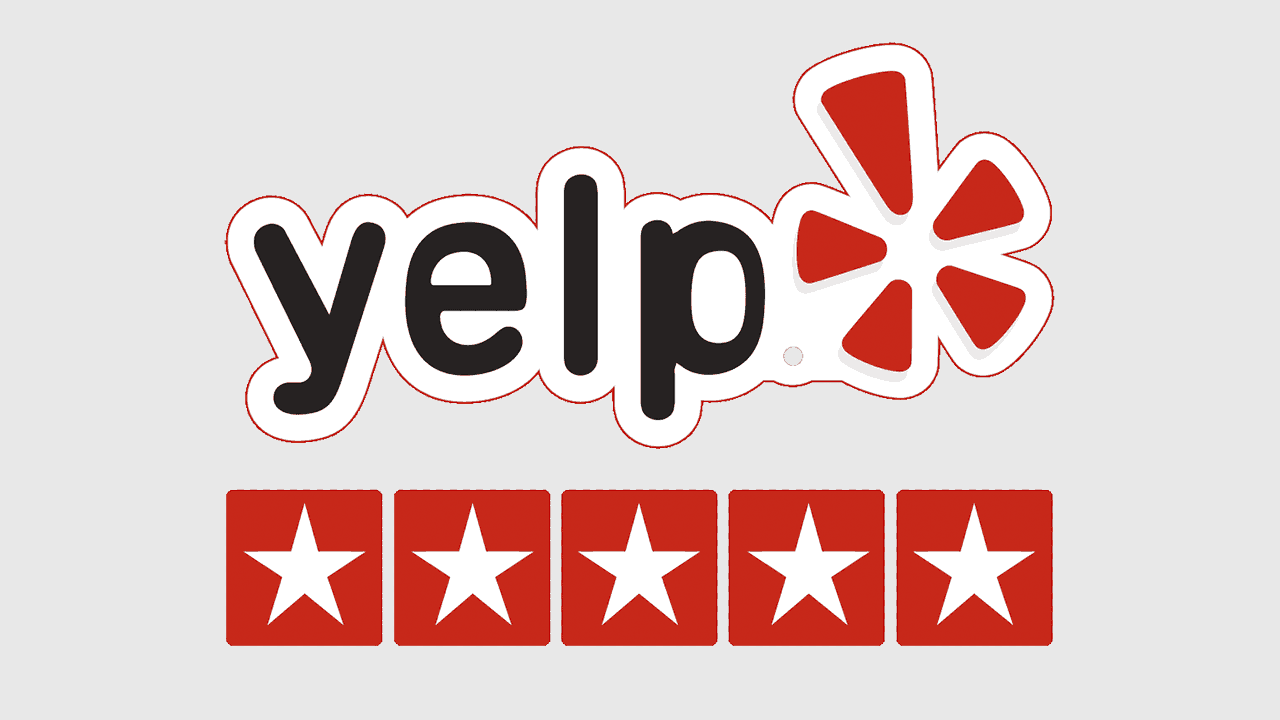

Para la práctica final de la asignatura, **trabajaremos con el dataset público de la compañía Yelp**, el cual se puede descargar [aquí](https://www.yelp.com/dataset/download). 

Yelp es una empresa estadounidense que ofrece una **plataforma en línea para revisar y recomendar servicios locales**, como restaurantes, hoteles y spas. La empresa también ofrece una aplicación móvil para facilitar el acceso a estas reseñas y recomendaciones. Yelp se fundó en 2004 y desde entonces ha crecido para convertirse en una de las principales plataformas de reseñas en línea a nivel mundial. La empresa se dedica a ayudar a las personas a encontrar los mejores servicios locales y hacer negocios con ellos.

## 2.1. Objetivo de negocio

**El objetivo de negocio es a través de la información registrada por los negocios en la plataforma y sus características, poder predecir si el promedio de puntuación que alcanzarán por parte de los usuarios será alto o bajo.** 

Para ello será necesario realizar un proceso de transformación de datos, necesario para poder tratar de una forma sencilla las variables durante el análisis exploratorio.

#  <a name="yelp">  3. Yelp Dataset  <a>

## 3.1. Información del dataset

El dataset de Yelp está compuesto por 5 archivos de tipo JSON:

**- yelp_academic_dataset_business.json**

**- yelp_academic_dataset_checkin.json**

**- yelp_academic_dataset_review.json**

**- yelp_academic_dataset_tip.json**

**- yelp_academic_dataset_user.json**

Cada archivo contiene variables y observaciones acerca de diferentes aspectos: negocios adscritos, visitas al negocio, reseñas, sugerencias y usuarios respectivamente. Si se quisiera consultar **más información acerca de la estructura de cada archivo y variables incluidas en los archivos, se puede encontrar en el archivo `Dictionary.md`**, el cual se encuentra en el directorio `data/processed`. 

## 3.2. Características del dataset

El **peso del dataset descomprimido es de 8.65 GB** y como ya se comentó en el punto anterior en **formato JSON**. 

Para generar ideas de negocio y aplicar posteriormente modelos de Machine Learning será **importante en un primer lugar realizar una transforamción de los datos**, con el objetivo de **reducir la carga computacional** y conseguir una mayor **sencillez trabajando** con ellos. 

# <a name="transformacion"> 4. Transformación del formato de ficheros <a>

El **formato JSON (JavaScript Object Notation) es un formato de texto que se utiliza para transmitir datos en una estructura de objetos anidados**. Es un formato comúnmente utilizado para intercambiar datos entre aplicaciones web. 

**Sin embargo, existen formatos mucho más eficientes en términos de lectura y escritura**, especialmente en ciencia de datos, como el formato Parquet. **Parquet es un formato de archivo de columnas que se utiliza para almacenar grandes cantidades de datos tabulares**.

**Es por ello que procederemos a convertir los archivos descargados en formato Parquet.**

In [3]:
# Transform the JSON files as Parquet introducing the path with the raw data.

#json_to_parquet('../data/raw/*.json')

# <a name="datos"> 5. Transformación de datos <a>

En este apartado trataremos de forma individual los ficheros necesarios para nuestro objetivo de negocio. Realizaremos los cambios necesarios para facilitar el manejo y análisis de los datos.

Para nuestro objetivo de negocio, el archivo que más transformaciones necesita es `yelp_academic_dataset_business`, por lo que nos centraremos únicamente en el. Dado que el resto de ficheros, contiene datos más limpios que no necesitan ser tratados de manera tan profunda.

## 5.1. Business

### 5.1.1 Carga del fichero

Cargamos el archivo `yelp_academic_dataset_business.parquet` para visualizar su estructura y estudiar las transformaciones a realizar.

In [5]:
# Load 'business_df'.

business_df = pd.read_parquet('../data/raw/yelp_academic_dataset_business.parquet')

Observamos su estructura

In [5]:
# Verification of the shape of 'business_df'.

print("The DF business_df contains " + str(business_df.shape[0]) +" rows and " + str(business_df.shape[1]) + " columns")

The DF business_df contains 150346 rows and 60 columns


Observamos los valores únicos de cada variable.

In [6]:
# Save the distinct values of business_df.

uniqueValues = business_df.nunique()

# Print 'uniqueValues'.

print('Number of dictinct values in each variable :')

print(uniqueValues)

Number of dictinct values in each variable :
business_id                              150346
name                                     114117
address                                  122844
city                                       1416
state                                        27
postal_code                                3362
latitude                                 135593
longitude                                131918
stars                                         9
review_count                               1158
is_open                                       2
categories                                83160
hours                                         0
attributes_ByAppointmentOnly                  3
attributes_BusinessAcceptsCreditCards         3
hours_Monday                               1315
hours_Tuesday                              1414
hours_Wednesday                            1403
hours_Thursday                             1462
hours_Friday                               

Tras realizar la transformación de JSON a Parquet las variables `hours` y `attributes` se extrayeron en nuevas columnas dejando a estas vacias, por lo que procedemos a su eliminación. 

In [7]:
# Drop the empty columns: 'attributes' and 'hours'.

business_df = business_df.drop(['attributes', 'hours'], axis=1)

### 5.1.2 Transformación de los datos

Una vez analizado el diccionario de datos, procederemos a modificar las variables más complejas con el objetivo de poder trabajar de una forma más sencilla en los procesos de explotación del dato.

Procedemos a comprobar que existen datos repetidos en las variables categoricas, como por ejemplo:

In [8]:
# Check the unique values for some variables:

print(" Los distintos valores que nos encontramos en la variable 'attributes_Alcohol' son: " +str(unique_values(business_df, 'attributes_Alcohol')))
print(" Los distintos valores que nos encontramos en la variable 'attributes_OutdoorSeating' son: " +str(unique_values(business_df, 'attributes_OutdoorSeating')))
print(" Los distintos valores que nos encontramos en la variable 'attributes_Open24Hours' son: " +str(unique_values(business_df, 'attributes_Open24Hours')))

 Los distintos valores que nos encontramos en la variable 'attributes_Alcohol' son: [None, "u'none'", "u'full_bar'", "'none'", "'full_bar'", "u'beer_and_wine'", "'beer_and_wine'", 'None']
 Los distintos valores que nos encontramos en la variable 'attributes_OutdoorSeating' son: [None, 'False', 'True', 'None']
 Los distintos valores que nos encontramos en la variable 'attributes_Open24Hours' son: [None, 'True', 'False']


Dado que encontramos algunos valores repetidos en distinto formato como por ejemplo: u'casual'"y "'casual'" procedemos a unificar estos tipos de valores a través de una de nuestras funciones importadas, 'replace_values'.

In [9]:
# Replace repeated values using the imported function 'replace_values'.

business_df = replace_values(business_df)

Procedemos a descomponer variables categóricas con diccionarios en su interior, añadiendo las claves como columnas, respetando sus valores en cada fila.

In [10]:
# Create a new df with each variable of attributes and add a prefix to differenciate them.

parking = pd.DataFrame([parser(x) for x in business_df.attributes_BusinessParking])
modify_column_titles(parking,'attributes_BusinessParking')

ambient = pd.DataFrame([parser(x) for x in business_df.attributes_Ambience])
modify_column_titles(ambient,'attributes_Ambience_')

music = pd.DataFrame([parser(x) for x in business_df.attributes_Music])
modify_column_titles(music,'attributes_Music_')

meal = pd.DataFrame([parser(x) for x in business_df.attributes_GoodForMeal])
modify_column_titles(meal,'attributes_GoodForMeal_')

best_nights = pd.DataFrame([parser(x) for x in business_df.attributes_BestNights])
modify_column_titles(best_nights,'attributes_BestNights_')

hair = pd.DataFrame([parser(x) for x in business_df.attributes_HairSpecializesIn]) 
modify_column_titles(hair,'attributes_HairSpecializesIn_')

diet = pd.DataFrame([parser(x) for x in business_df.attributes_DietaryRestrictions])      
modify_column_titles(diet,'attributes_DietaryRestrictions_')

# Group in a list the new dataframes.
attributes = [parking, ambient, music, meal, best_nights, hair, diet]

Procedemos a unificar las tablas recien creadas, saltandonos la primera columna, la cual indicaba si la fila tiene al menos un valor no NaN.

In [11]:
# Skip the amb_empty column. and join all the categories DF's in one called 'categories'

attributes_df = join_skip_first(attributes)

Unificamos todas las variables modificadas junto a las originales. Eliminando las que hemos extraido y quedaron vacías.

In [12]:
# Add the categories with the rest of variables.

final_df = pd.concat([business_df, attributes_df], axis=1)

# Drop the original variables.

final_df = final_df.drop(columns=['attributes_BusinessParking', 'attributes_Ambience', 'attributes_Music', 
                                  'attributes_GoodForMeal' , 'attributes_BestNights' , 'attributes_HairSpecializesIn',
                                  'attributes_DietaryRestrictions'], axis=1)

Ahora procedemos a reemplazar los valores None, True y False por NaN, 1 y 0, respectivamente.

In [13]:
# Replace using the funcion 'replace_binary_values'.

final_df = replace_binary_values(final_df)

Calculamos el nº de horas que esta abierto un local y lo agregamos al dataset. Para ello creamos una lista con las variables que incluyen la franja horaria de cada día.

In [14]:
# Create a list with the variables that include the daily schedule.

date_variables = ['hours_Monday','hours_Tuesday','hours_Wednesday','hours_Thursday','hours_Friday','hours_Saturday','hours_Sunday']

Extraemos en `final_df` El nº de horas que abre cada local eliminando las varialbes originales que indicaban los horarios, dado que no los vamos a utilizar.

In [15]:
# Extract the total daily open hours of each business.

final_df = extract_total_hours(final_df, date_variables)

# Drop the original variables.

final_df = final_df.drop(date_variables, axis=1)

Finalmente, la única variable que quedaría a tratar sería la de `categories`. Para ello crearemos un DF nuevo `categories_df` dado que existe un gran número de categorías. En el incluiremos `business_id` y `name` con el objetivo de filtrar posteriormente aquellos ID que correspondan a la categoría que nos interese analizar.

In [16]:
# Extract the 'business_id','name', 'categories' variables form final_df.

test = final_df[['business_id','name', 'categories']]

# Create 'category_df' extracting the different categories as new binay variables.

categories_df = test.join(test['categories'].str.get_dummies(', '))

# Drop 'categories' from both dataframes.

categories_df = categories_df.drop('categories', axis=1)
final_df = final_df.drop('categories', axis=1)

# Display 'categories_df'

display(categories_df)

,business_id,name,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.1.3 Exportación de ficheros procesados.

Una vez extraidas las variables y realizadas las transformaciones, procedemos a exportar `business_df` en formato parquet para realizar posteriormente el análisis exploratorio.

Como hemos mencionado anteriormente, debido al gran número de categorias se ha optado por exportarlas en un fichero nuevo llamado  `categories_df`. Para posteriormente filtrar `business_id` por las categorías interesadas.

In [19]:
# Convert 'final_df' and 'categories_df' to string to be able to save them as parquet.

final_df = final_df.apply(lambda x: x.astype(str))
categories_df = categories_df.apply(lambda x: x.astype(str))

# Saves 'final_df and 'categories_df' as parquet files.

categories_df.to_parquet('../data/processed/categories_df.parquet')
final_df.to_parquet('../data/processed/business_df.parquet')

[Ir arriba del documento](#top)